First five instances of the dataset:
     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
NaN values in 'Type' column: 0
Unique values in 'Type' column: ['Muffin' 'Cupcake']


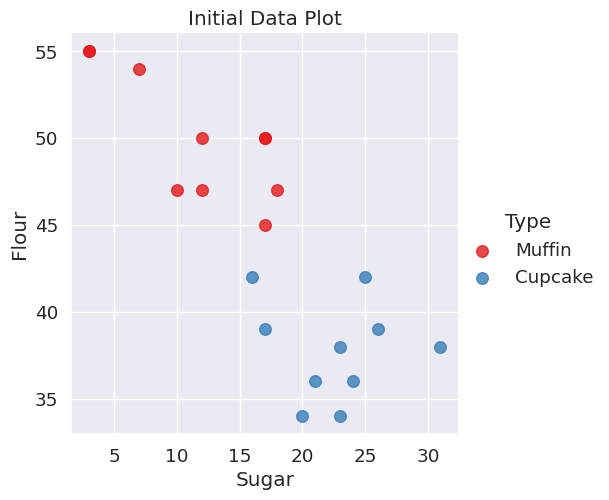

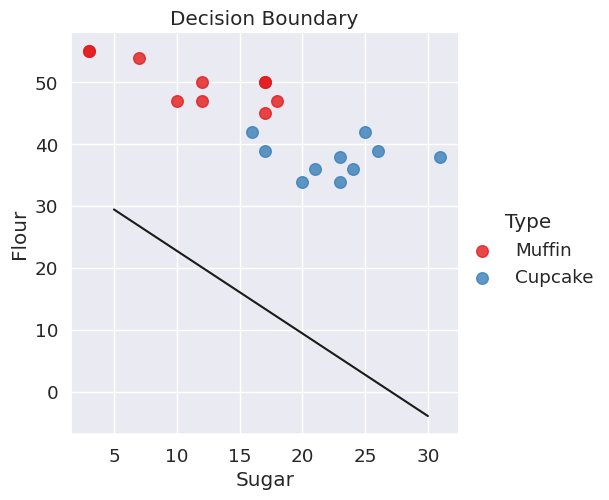

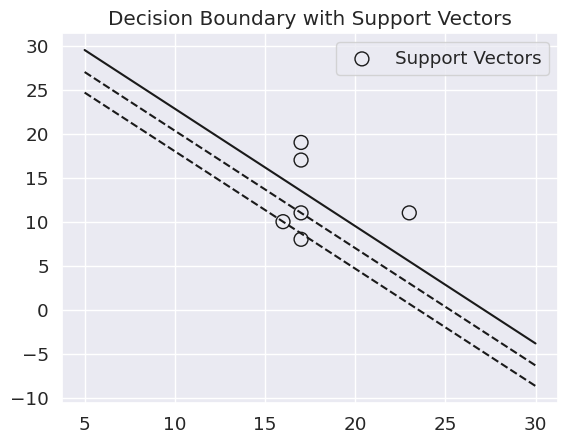

Confusion Matrix:
[[2 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         0.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [4]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Set font scale for seaborn
sns.set(font_scale=1.2)

# Step 2: Load and Display Dataset
data = pd.read_csv('recipes_muffins_cupcakes.csv')
print("First five instances of the dataset:")
print(data.head())

# Check for NaN values
print("NaN values in 'Type' column:", data['Type'].isna().sum())
print("Unique values in 'Type' column:", data['Type'].unique())

# Step 3: Plot Initial Data
sns.lmplot(data=data, x='Sugar', y='Flour', hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.title("Initial Data Plot")
plt.show()

# Step 4: Prepare Data for SVM
sugar_butter = data[['Sugar', 'Butter']]
type_label = data['Type'].map({
    'Muffin': 0,
    'Other': 1,  # Update based on your dataset categories
}).fillna(-1)  # Replace NaNs with -1

# Ensure no NaN values
if type_label.isna().any():
    print("Warning: NaN values present in type_label after mapping. Check categories.")
    type_label = type_label.fillna(-1)

# Step 5: Train SVM Model
model = SVC(kernel='linear')
model.fit(sugar_butter, type_label)

# Step 6: Calculate Decision Boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Step 7: Calculate Support Vector Boundaries
support_vectors = model.support_vectors_
b = support_vectors[0]
yy_down = a * xx + (b[1] - a * b[0])

b = support_vectors[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Step 8: Plot Decision Boundary
sns.lmplot(data=data, x='Sugar', y='Flour', hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, 'k-')
plt.title("Decision Boundary")
plt.show()

# Step 9: Plot Support Vector Boundaries
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Decision Boundary with Support Vectors")
plt.legend()
plt.show()

# Step 10: Import Additional Libraries (already done)

# Step 11: Split Dataset
x_train, x_test, y_train, y_test = train_test_split(sugar_butter, type_label, test_size=0.2, random_state=42)

# Step 12: Train New Model
model1 = SVC(kernel='linear')
model1.fit(x_train, y_train)

# Step 13: Make Predictions
pred = model1.predict(x_test)

# Step 14: Evaluate Model
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
